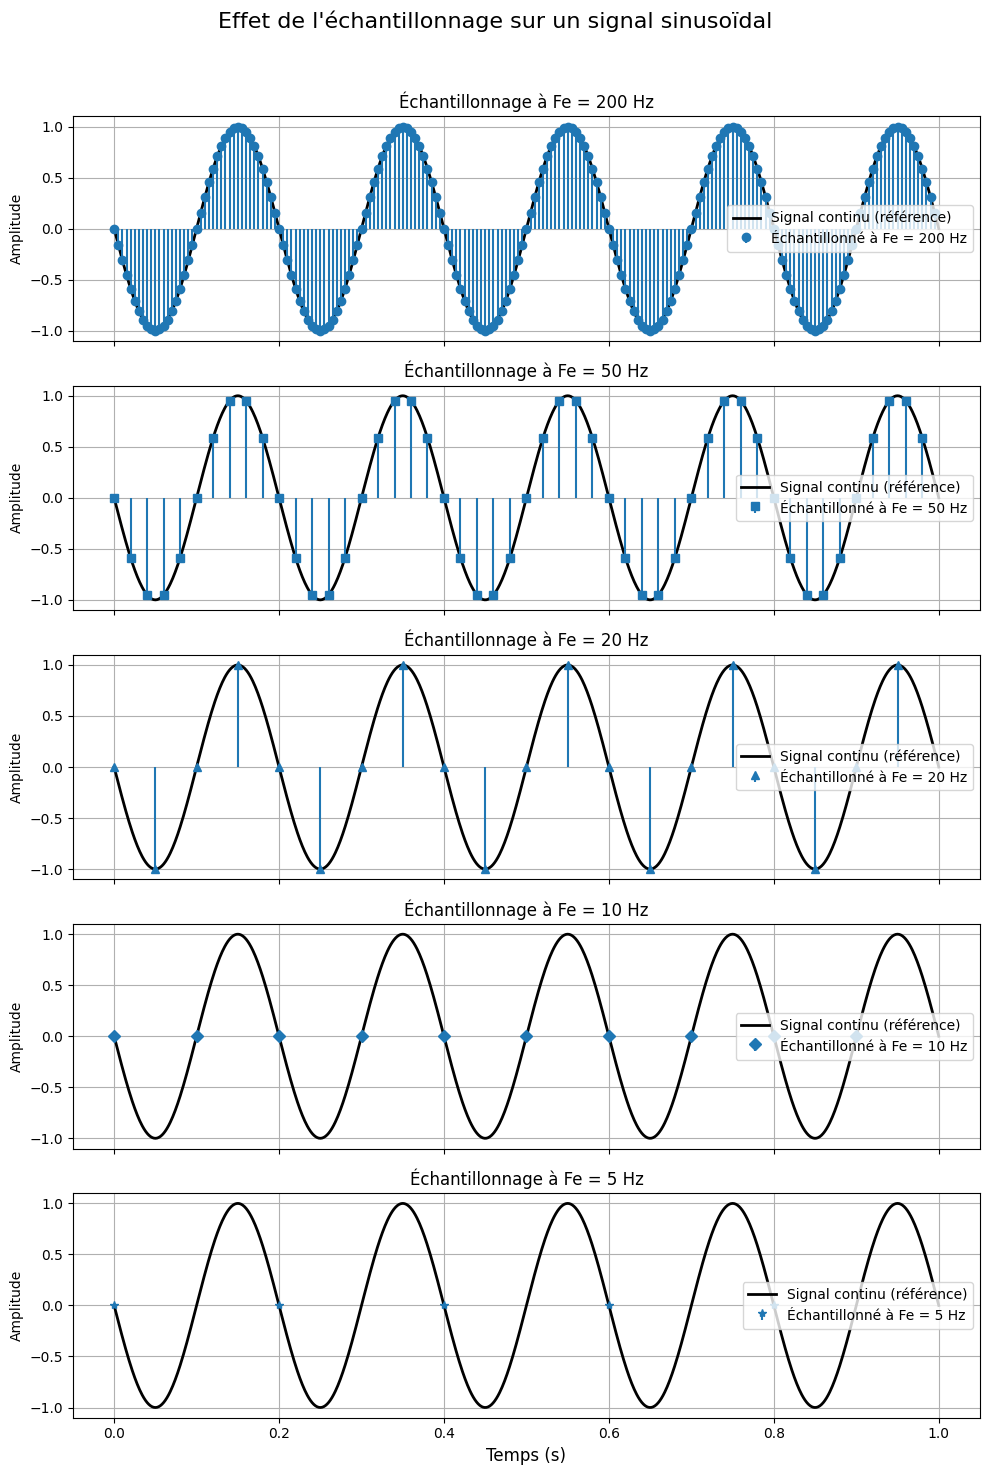

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Paramètres du signal sinusoïdal
A = 1                # Amplitude
f = 5                # Fréquence (Hz)
phi = np.pi          # Phase (radians)
D = 1                # Durée (s)
Fe_continu = 1000    # Fréquence d'échantillonnage pour le signal continu (Hz)

# Génération du signal continu
t_continu = np.linspace(0, D, Fe_continu * D)  # Temps avec haute résolution
signal_continu = A * np.sin(2 * np.pi * f * t_continu + phi)

# Fréquences d'échantillonnage et symboles correspondants
Fe_values = [500,200, 50, 20, 10, 5]  # En Hz
symbols = ['o','o', 's', '^', 'D', '*']  # Symboles pour chaque fréquence

# Création de la figure avec sous-figures
fig, axes = plt.subplots(len(Fe_values), 1, figsize=(10, 15), sharex=True)
fig.suptitle("Effet de l'échantillonnage sur un signal sinusoïdal", fontsize=16)

# Tracé du signal continu sur chaque sous-figure
for ax, Fe, symbol in zip(axes, Fe_values, symbols):
    t_sampled = np.arange(0, D, 1/Fe)  # Temps échantillonné
    signal_sampled = A * np.sin(2 * np.pi * f * t_sampled + phi)
    
    # Signal continu
    ax.plot(t_continu, signal_continu, label="Signal continu (référence)", color="black", linewidth=2)
    # Signal échantillonné
    ax.stem(
        t_sampled, signal_sampled, 
        linefmt="C0-", markerfmt=f"C0{symbol}", basefmt=" ", 
        label=f"Échantillonné à Fe = {Fe} Hz"
    )
    
    # Mise en forme de la sous-figure
    ax.set_title(f"Échantillonnage à Fe = {Fe} Hz", fontsize=12)
    ax.set_ylabel("Amplitude", fontsize=10)
    ax.grid(True)
    ax.legend()

# Ajustement des axes et étiquettes
axes[-1].set_xlabel("Temps (s)", fontsize=12)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Ajustement pour le titre global
plt.show()
